<a href="https://colab.research.google.com/github/tejasmanchi/NLP/blob/main/Spam_Classification_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries And Data

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/SMSSpamCollection',sep='\t',
                       names=['label','message'])

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label']=df['label'].replace({'spam':1 ,'ham':0})

In [ ]:
df.isna().any()

label      False
message    False
dtype: bool

#Stop Word Removal,Tokenization & Stemmming 

In [ ]:
df['message']=df['message'].apply(lambda x: x.lower())

In [ ]:
df['message']=df['message'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))
df['message']

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in   a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the  nd time we have tried   contact u...
5568                 will   b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['message']=df['message'].apply(lambda x: ' '.join([word for word in x.split()if word not in stop_words]))
df['message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [ ]:
df['message']=df['message'].apply(lambda x: word_tokenize(x))
df['message']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

In [ ]:
ps=PorterStemmer()
df['message']=df['message'].apply(lambda x: ' '.join([ps.stem(y) for y in x]))
df['message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [ ]:
y=df['label']
x=df['message']

#Bag Of Words


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(x)
X_dense=X.toarray()

#Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_dense,y,test_size=0.20,random_state=42)

In [ ]:
len(x_train), len(x_test), len(y_train), len(y_test)

(4457, 1115, 4457, 1115)

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#Metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cr = classification_report(y_test,y_pred)
print(cr)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of the model = ',accuracy)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy of the model =  0.97847533632287


[[966   0]
 [ 24 125]]


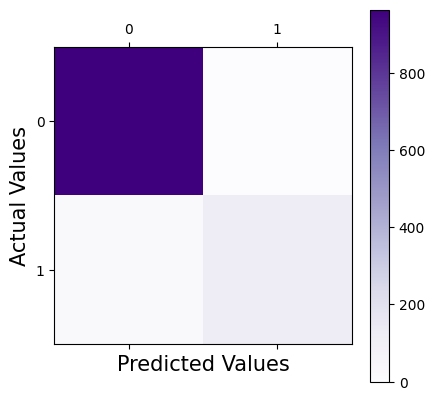

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
plt.matshow(cm,cmap=plt.cm.Purples)
#plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
print(cm)